In [1]:
# RESULT: PASS. Corroborate with Haddock Fulldata
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import needell_ssnmf
from needell_ssnmf import Needell_SSNMF

import display_ssnmf
from display_ssnmf import *


In [2]:
data = LymeData({CHRONIC, NEURO},{DIAG_CIR, ADDL_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)


data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Needell_SSNMF(data_matrix, label_matrix)
train_results, test_results, reconerr_results = ssnmf.fulldatasearch(param_range={'k': [3,6],'lambda': np.linspace(0,1,10), 'random_state': range(0,5)}
                                                          , get_topic_accu_distr=True, get_reconerr_distr=True)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(878, 29)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical Health Days', 'Disability',
       'general practitioner', 'infectious disease specialist', 'internist',
       'lyme specialist', 'other doctor', 'pediatrician', 'rheumatologist',
       'non_neuro', 'neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


best train results:  (0.9344729344729344, {'k': 6, 'lambda': 1.0, 'random_state': 4}, 44.86345294487167, 9.247705623615776, 0.5284090909090909)
best test results:  (0.6022727272727273, {'k': 3, 'lambda': 1.0, 'random_state': 2})


In [3]:
print(train_results)
print(test_results)


{'best_train_accu': 0.9344729344729344, 'best_train_param': {'k': 6, 'lambda': 1.0, 'random_state': 4}, 'train_accu_distr':            3         6
0   0.596866  0.606838
1   0.581197  0.615385
2   0.574074  0.596866
3   0.556980  0.585470
4   0.595442  0.605413
5   0.611111  0.613960
6   0.601140  0.628205
7   0.578348  0.611111
8   0.558405  0.603989
9   0.609687  0.618234
10  0.618234  0.621083
11  0.613960  0.638177
12  0.606838  0.623932
13  0.562678  0.632479
14  0.628205  0.625356
15  0.643875  0.616809
16  0.626781  0.643875
17  0.618234  0.639601
18  0.569801  0.658120
19  0.638177  0.626781
20  0.663818  0.629630
21  0.662393  0.660969
22  0.629630  0.650997
23  0.578348  0.683761
24  0.662393  0.658120
25  0.688034  0.655271
26  0.693732  0.675214
27  0.658120  0.672365
28  0.594017  0.723647
29  0.688034  0.680912
30  0.713675  0.672365
31  0.710826  0.696581
32  0.698006  0.712251
33  0.608262  0.747863
34  0.706553  0.713675
35  0.736467  0.722222
36  0.733618  0.716524
37

In [4]:
value_to_check = 0.7234190410006949
contains_value = (test_results['test_accu_distr'] == value_to_check).any().any()

print(contains_value)

False


best_train_accu 0.9344729344729344
best_train_param {'k': 6, 'lambda': 1.0, 'random_state': 4}


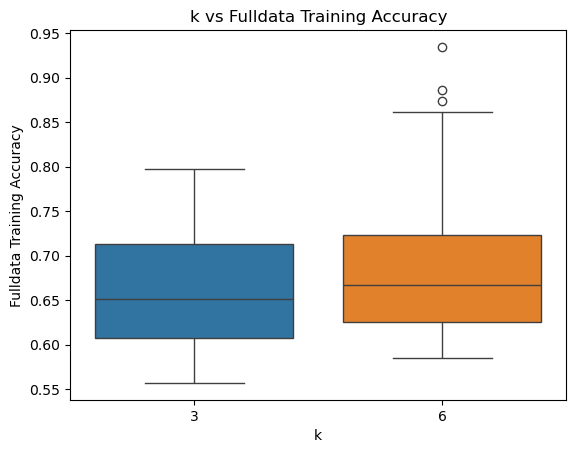

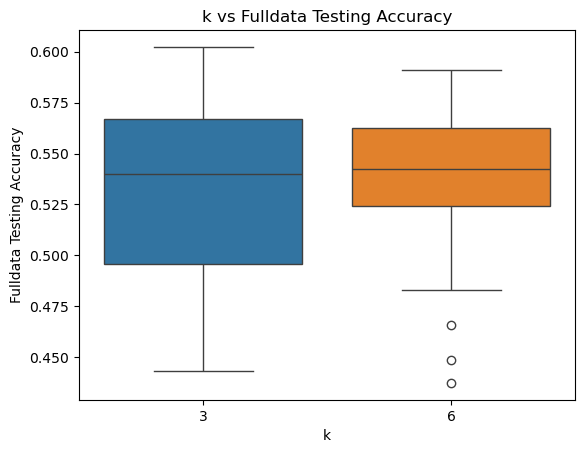

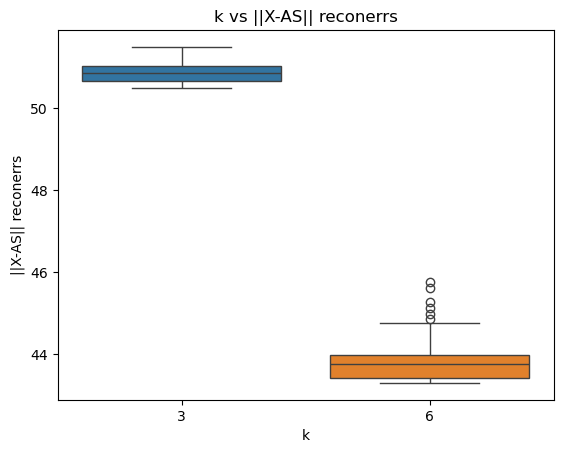

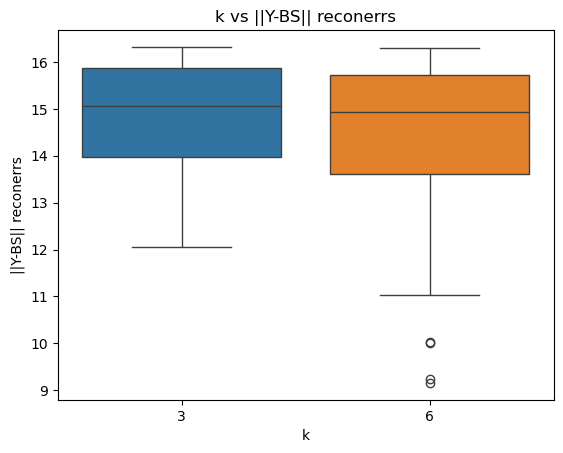

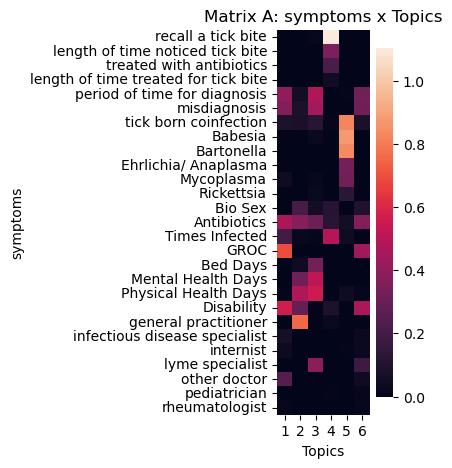

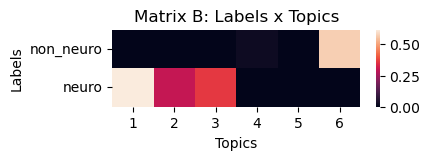

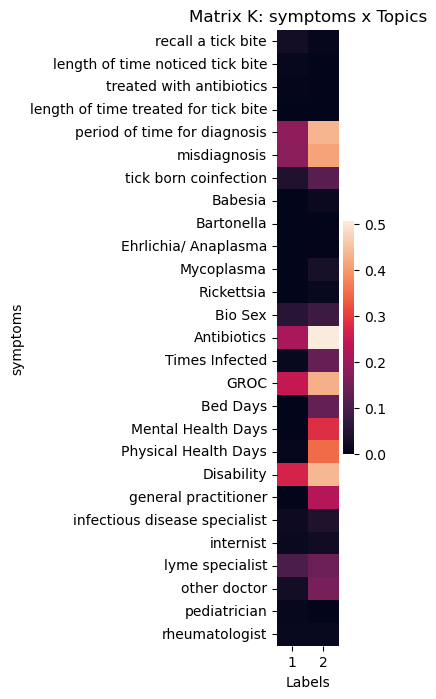

In [5]:
for k,v in train_results.items():
    if type(v) is not type(pd.DataFrame()):
        print(k,v)

# for k,v in test_results.items():
#     if type(v) is not type(pd.DataFrame()):
#         print(k,v)
        
train_accu_distr = train_results['train_accu_distr']
test_accu_distr = test_results['test_accu_distr']
Xreconerr_distr = reconerr_results['Xreconerr_distr']
Yreconerr_distr = reconerr_results['Yreconerr_distr']


display_distr(train_accu_distr, ylabel='Fulldata Training Accuracy')
display_distr(test_accu_distr, ylabel='Fulldata Testing Accuracy')

display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')

names = SYMPTOMS
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.fulldata_best_train_model

display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)
